<a href="https://colab.research.google.com/github/Subhajit53/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Email Campaign Effectiveness Prediction : Characterize the mail and track the mail</u></b>

## <b> Problem Description </b>

### Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

## <b> Data Description </b>

### Number of observations : 68353

### <b> Columns : </b>

1.   Email_ID : Unique identifier of emails sent
2.   Email_Type : Type of email encoded as 1 and 2   
3.   Subject_Hotness_Score : A score between 0 to 5 for hotness of the email topic
4.   Email_Source_Type : Source of email encoded as 1 and 2
5.   Customer_Location : Location of customer encoded as A,B,C,D,E,F,G
6.   Email_Campaign_Type : Type of campaign encoded as 1, 2 and 3
7.   Total_Past_Communications : Number of past communications
8.   Time_Email_sent_Category	: Time at which email email was sent encoded as 1, 2 and 3
9.   Word_Count : Words in the email
10.   Total_Links : Number of links in the email
11.   Total_Images : Number of images in the email
12.   Email_Status : Email status encoded as 0 : ignored, 1 : read, 2 : acknowledged









# **Introduction :**
##### An email campaign is a sequence of marketing efforts that contacts multiple recipients at once. Email campaigns are designed to reach out to subscribers at the best time and provide valuable content and relevant offers. Using email campaigns allows you to build deep and trusting relationships with your customers.

##### There are multiple factors that are working behind success of an email campaign like email contents, time at which email was sent, length of the email etc.

##### Here, I want to build a classification model to predict whether any particular campaign email is going blind or hitting the target.

# **Approach :**
##### To solve the problem, I have devised a 3-step approach below:

#### **1. Basic EDA :**
##### In this step, I want to do some exploration on the data. First, I shall check for null values and try to replace or remove them. Then, I shall check for outliers using boxplots and try to replace or remove them. Thirdly, I shall get some visualizations to get an idea of the variables in hand.


#### **2. Model training and testing :**
##### In this step, I shall get a train-test pair from the given dataset and fit 4 classification models to the train set, make predictions on the test set using them and calculate various evaluation metrics. The models are namely : Decision Trees, Random Forests, Gradient Boosting Machine, Naive-Bayes Classifier.

**Note:** A point to be noted here. We can't fit a logistic regression here as this is a multi-class (>2) classification problem.

#### **3. Model Evaluation :**
##### As the last step, I shall compare all the models and try to come up with a conclusion about which model might be the best choice here. And I'll talk about variable importance too.


# **Analysis:**

### **Data Exporting and exploration :**

In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Classification Project/data_email_campaign.csv', index_col='Email_ID')

In [ ]:
"# Getting a glimpse of the data
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
Email_ID,,,,,,,,,,,
EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
# Getting the shape of the data
df.shape

(68353, 11)

In [ ]:
# Getting a short info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68353 entries, EMA00081000034500 to EMA00089999316900
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Customer_Location          56758 non-null  object 
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  61528 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                66152 non-null  float64
 9   Total_Images               66676 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


## **1. Basic EDA :**

### **Imputing Missing Values :**

From the data shape and info it is clear that there are some null values in the dataset. Let's have a look at them and see what we can do to impute them.

The columns with missing values are :

1.   Customer_Location (Categorical)
2.   Total_Past_Communications (Numerical)
3.   Total_Links (Numerical)
4.   Total_Images (Numerical)



We can do one thing here. We can first get dummy features on categorical column and then use KNNImputer to impute the missing values.

In [ ]:
# Getting dummy variables
df_with_dummy = pd.get_dummies(df, prefix = '', prefix_sep = '')

In [ ]:
# Imputing missing data using KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
df_with_no_na = imputer.fit_transform(df_with_dummy)

In [ ]:
df_with_no_na = pd.DataFrame(df_with_no_na, columns = df_with_dummy.columns)

Cool! Now let's impute the new modified columns to the main dataset.

In [ ]:
# Replace columns with na values
df['Total_Past_Communications'] = df_with_no_na['Total_Past_Communications'].values
df['Total_Links'] = df_with_no_na['Total_Links'].values
df['Total_Images'] = df_with_no_na['Total_Images'].values

In [ ]:
# Check the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68353 entries, EMA00081000034500 to EMA00089999316900
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Customer_Location          56758 non-null  object 
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  68353 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                68353 non-null  float64
 9   Total_Images               68353 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


Awesome! Now let's do something about the categorical column. I am going to use ML to solve this problem. I will build a simple Decision Trees model to predict Customer Location based on other features which will be trained on non-null observations and will predict on null observations.

In [ ]:
# Preparing the data
df_with_no_null_cust_loc = df[df['Customer_Location'].isna() == False]
df_with_null_cust_loc = df[df['Customer_Location'].isna() == True]

In [ ]:
# Getting Training set
X_train = df_with_no_null_cust_loc.drop(['Customer_Location'], axis = 1)
y_train = df_with_no_null_cust_loc['Customer_Location']
X_test = df_with_null_cust_loc.drop(['Customer_Location'], axis = 1)

# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Fitting the model
dtree_model = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)

# Getting accuracy on train set
print(dtree_model.score(X_train, y_train))

0.933877162690722


Pretty good! Now I will use this model to get my Customer Locations filled.

In [ ]:
# Getting predictions and saving it with null valued dataset
prediction = pd.DataFrame(dtree_model.predict(X_test), columns = ['Customer_Location'], index = df_with_null_cust_loc.index)
df_with_null_cust_loc = pd.merge(df_with_null_cust_loc, prediction[['Customer_Location']], how = 'left',left_index = True, right_index = True)

In [ ]:
# Replacing nulls with predicted values in the original dataset
df.loc[df['Customer_Location'].isna() == True, 'Customer_Location'] = df_with_null_cust_loc['Customer_Location_y']

In [ ]:
# Check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68353 entries, EMA00081000034500 to EMA00089999316900
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Customer_Location          68353 non-null  object 
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  68353 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                68353 non-null  float64
 9   Total_Images               68353 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


Alright! Now we are done with the treatment of null values. Now let's have some visualizations!

### **Visualizations :**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Types bar plot')

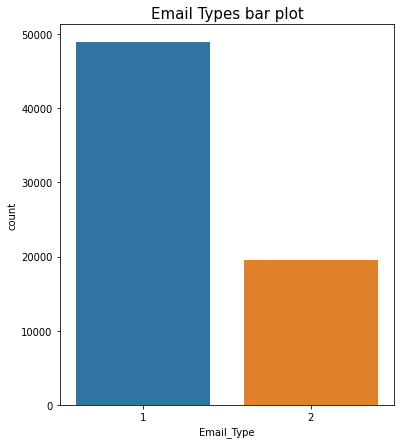

In [ ]:
# Plotting bar plot for Email_Type
plt.figure(figsize=(6,7))
sns.countplot(df['Email_Type'])
plt.title('Email Types bar plot', fontsize=15)

##### **Inference :** Most of the emails were of type 1.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot of Subject Hotness Score')

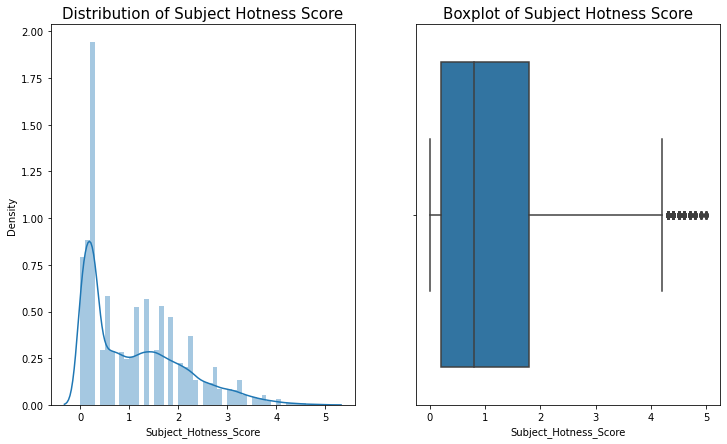

In [ ]:
# Plotting histogram and Boxplot for Subject_Hotness_Score
plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
sns.distplot(df['Subject_Hotness_Score'])
plt.title('Distribution of Subject Hotness Score', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(df['Subject_Hotness_Score'])
plt.title('Boxplot of Subject Hotness Score', fontsize=15)

##### **Inference :** Emails with lower subject hotness score is higher in numbers. There are some outliers too.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Source Types bar plot')

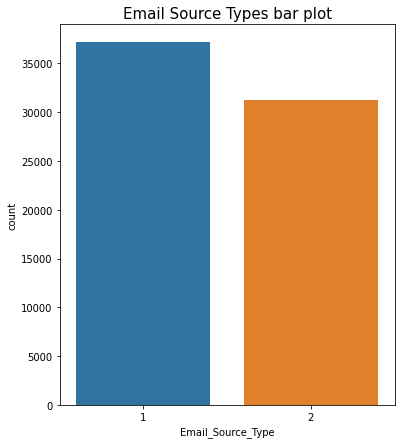

In [ ]:
# Plotting bar plot for Email_Source_Type
plt.figure(figsize=(6,7))
sns.countplot(df['Email_Source_Type'])
plt.title('Email Source Types bar plot', fontsize=15)

##### **Inference :** Emails were sent from both the sources with almost equal probability.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Customer Locations bar plot after imputing nulls')

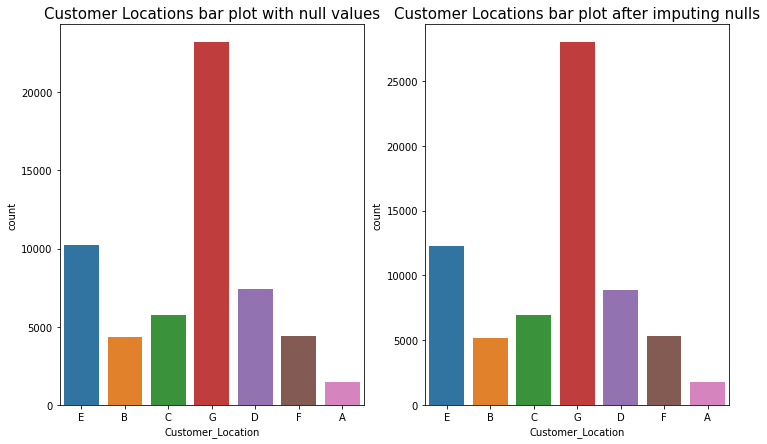

In [ ]:
plt.figure(figsize=(12,7))

# Reading the dataset again
df1 = pd.read_csv('/content/drive/MyDrive/Classification Project/Copy of data_email_campaign.csv', index_col='Email_ID')

# Plotting Customer Locations with null values
plt.subplot(1,2,1)
sns.countplot(df1['Customer_Location'])
plt.title('Customer Locations bar plot with null values', fontsize=15)

# Plotting bar plot for Customer_Location
plt.subplot(1,2,2)
sns.countplot(df['Customer_Location'])
plt.title('Customer Locations bar plot after imputing nulls', fontsize=15)

##### **Inference :** Area G has most number of customers and area A has least number of customers. Also the bars from before and after missing value imputation are in conjunction which implies the method of predicting missing values has worked quite well.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Campaign Types bar plot')

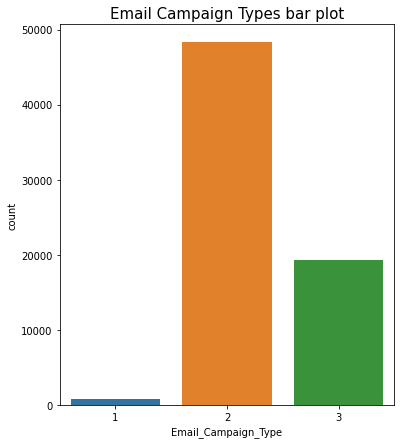

In [ ]:
# Plotting bar plot for Email_Campaign_Type
plt.figure(figsize=(6,7))
sns.countplot(df['Email_Campaign_Type'])
plt.title('Email Campaign Types bar plot', fontsize=15)

##### **Inference :** Most of the emails were sent as a part of 2nd type of campaign.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot of Total Past Communications happened')

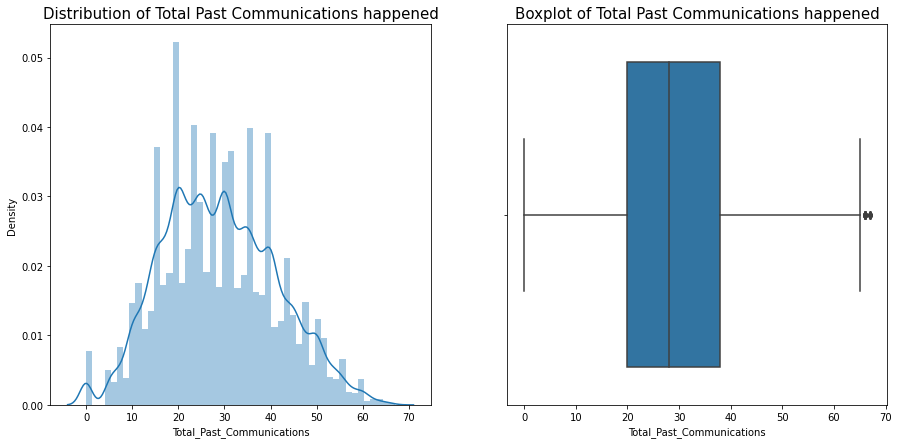

In [ ]:
# Plotting histogram and Boxplot for Total_Past_Communications
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.distplot(df['Total_Past_Communications'])
plt.title('Distribution of Total Past Communications happened', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(df['Total_Past_Communications'])
plt.title('Boxplot of Total Past Communications happened', fontsize=15)

##### **Inference :** Number of Total Past Communications is somehow normally distributed with average number of communications around 30. There are 2 outlier points too.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bar plot showing time of the email sent')

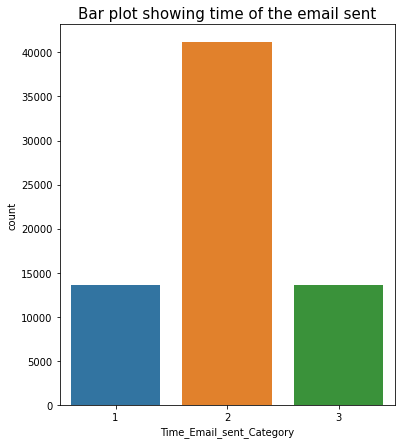

In [ ]:
# Plotting bar plot for Time_Email_sent_Category
plt.figure(figsize=(6,7))
sns.countplot(df['Time_Email_sent_Category'])
plt.title('Bar plot showing time of the email sent', fontsize=15)

##### **Inference :** Most of the emails were sent at the time bucket 2.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot of Word Counts in the email')

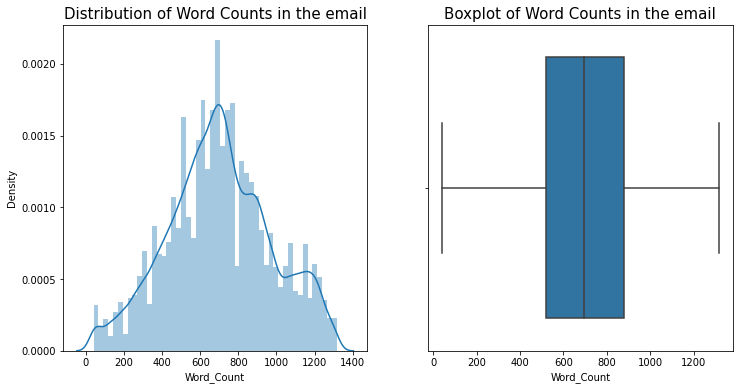

In [ ]:
# Plotting histogram for Word_Count
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df['Word_Count'])
plt.title('Distribution of Word Counts in the email', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(df['Word_Count'])
plt.title('Boxplot of Word Counts in the email', fontsize=15)

##### **Inference :** Email word counts is somehow normally distributed with mean number of words around 700.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Average number of links in emails : 10.412959197109124


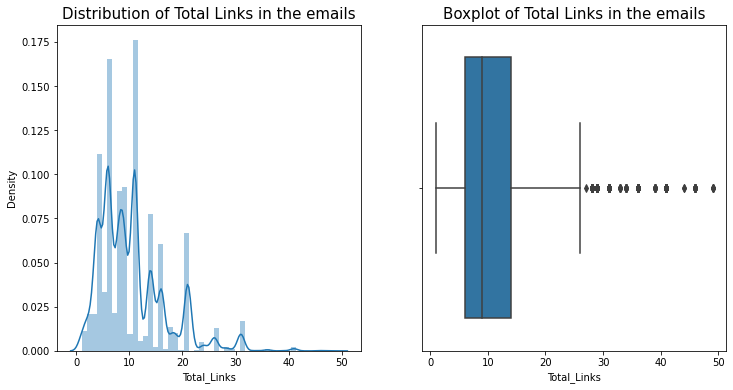

In [ ]:
# Plotting histogram and Boxplot for Total_Links
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df['Total_Links'])
plt.title('Distribution of Total Links in the emails', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(df['Total_Links'])
plt.title('Boxplot of Total Links in the emails', fontsize=15)

print(f"Average number of links in emails : {df['Total_Links'].mean()}")

##### **Inference :** Total link numbers has no distinct distribution. Emails have mean number of links around 10. Further investigation is required on this feature. There are a few outlier points.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot of Total Images in the emails')

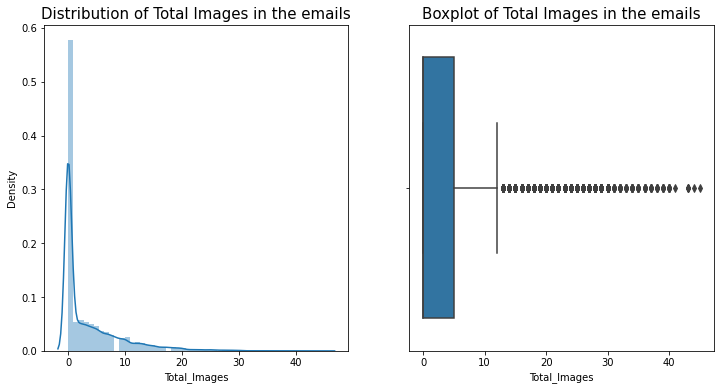

In [ ]:
# Plotting histogram for Total_Images
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df['Total_Images'])
plt.title('Distribution of Total Images in the emails', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(df['Total_Images'])
plt.title('Boxplot of Total Images in the emails', fontsize=15)

##### **Inference :** Most of emails had no photos in it. There are a few outlier points.

Text(0.5, 1.0, 'Pie Chart showing Email Status')

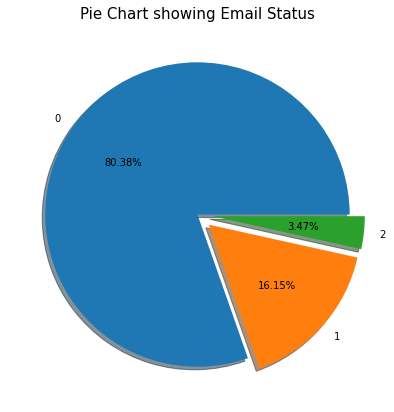

In [ ]:
# Plotting a pie chart for Email_Status
plt.figure(figsize = (10,7))
plt.pie(df['Email_Status'].value_counts(), labels = [0,1,2], explode = [0,0.1,0.1], autopct='%1.2f%%', shadow = True)
plt.title('Pie Chart showing Email Status', fontsize = 15)

##### **Inference :** Around 3.47% of the emails are actually hitting targets that is those customers are reading and acknowledging the mails. Around 16.15% of customers are reading the mails who might be potential customers given some offers or something else.

### **Some Further Investigations :**

In [ ]:
# Getting number of rows which have non-integer Total_Past_Communications
df[df['Total_Past_Communications'] % 1 != 0].shape

(4519, 11)

Interesting! It seems like some of the past communications are not integers. And number of calls cannot be non-integer, right? So, let's impute these cells with closest integers.

In [ ]:
# Imputing non-integer Total_Past_Communications with closest integers.
df.loc[df['Total_Past_Communications'] % 1 != 0, 'Total_Past_Communications'] = df[df['Total_Past_Communications'] % 1 != 0]['Total_Past_Communications'].apply(round)

Great! Now investigate and do the same for other features too!

In [ ]:
# Getting number of rows which have non-integer Word_Count, Total_Links, Total_Images
print(df[df['Word_Count'] % 1 != 0].shape)
print(df[df['Total_Links'] % 1 != 0].shape)
print(df[df['Total_Images'] % 1 != 0].shape)

(0, 11)
(1441, 11)
(879, 11)


In [ ]:
# Imputing non-integer values with closest integers.
df.loc[df['Total_Links'] % 1 != 0, 'Total_Links'] = df[df['Total_Links'] % 1 != 0]['Total_Links'].apply(round)
df.loc[df['Total_Images'] % 1 != 0, 'Total_Images'] = df[df['Total_Images'] % 1 != 0]['Total_Images'].apply(round)

### **Outlier Removal :**

We can see that there are very few outliers in individual columns, I am going to perform an anomaly detection using Isolation Forest and get rid of 0.1% data only.

In [ ]:
# Deleting anomalies using Isolation Forest
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50,max_samples='auto',contamination=0.001,random_state=123,max_features=5)
model.fit(pd.get_dummies(df))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, max_features=5, n_estimators=50,
                random_state=123)

In [ ]:
# Assigning anomaly tags to observations
df['Anomaly'] = model.predict(pd.get_dummies(df))
df.Anomaly.value_counts()

 1    68284
-1       69
Name: Anomaly, dtype: int64

In [ ]:
# Taking non-anomalous observations only
df = df[df['Anomaly'] == 1]

# Dropping Anomaly column
df.drop(['Anomaly'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Awesome! Now let's move towards the second section of this project that is model training and testing.

## **2. Model Training and Testing :**

### **Preparing the data for training :**

In [ ]:
# Getting dummies
df_to_train = pd.get_dummies(df)

In [ ]:
# Splitting dependent and independent features
X = df_to_train.drop(['Email_Status'], axis = 1)
y = df_to_train['Email_Status']

Now, we have already seen that there is a class imbalance in the dependent variable Email_Status. I am going to use SMOTE to perform oversampling on minority classes.

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Initializing SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 123, stratify = y_smote)

In [ ]:
def model_trainer_tester(model, X_train_func, X_test_func, y_train_func, y_test_func, params = None):
  '''
  This function takes model, training and testing sets and parameter combinations as input
  and gives model performance and best parameters as output
  '''

  # Importing evaluation metrics
  from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score, make_scorer, roc_auc_score, precision_score, accuracy_score

  # Conditioning if a parameter set is provided or not
  if params == None:

    # Fitting the model
    model.fit(X_train_func, y_train_func)

    # Prediction on training set
    y_pred_train = model.predict(X_train_func)

    # Prediction on testing set
    y_pred_test = model.predict(X_test_func)

    # Getting and printing evaluation metrics
    print('Confusion Matrix for Training set : \n')
    print(confusion_matrix(y_train_func, y_pred_train))
    print('Confusion Matrix for Testing set : \n')
    print(confusion_matrix(y_test_func, y_pred_test))

    print('Classification report for Training set : \n')
    print(classification_report(y_train_func, y_pred_train))
    print('Classification report for Testing set : \n')
    print(classification_report(y_test_func, y_pred_test))

  else:

    # Importing GridSearchCV
    from sklearn.model_selection import GridSearchCV

    # Grid Search on provided parameter sets
    scorers = {
    'precision_score': make_scorer(precision_score, average = 'weighted'),
    'recall_score': make_scorer(recall_score, average = 'weighted'),
    'accuracy_score': make_scorer(accuracy_score)
    }
    class_model = GridSearchCV(estimator = model, param_grid = params, scoring = scorers, refit = 'recall_score', cv = 3, verbose = 2)
    class_model.fit(X_train_func, y_train_func)

    # Getting the optimal model and parameters
    optimal_model = class_model.best_estimator_
    optimal_model.fit(X_train_func, y_train_func)
    optimal_params = class_model.best_params_

    # Prediction on training set
    y_pred_train = optimal_model.predict(X_train_func)

    # Prediction on testing set
    y_pred_test = optimal_model.predict(X_test_func)

    # Getting and printing evaluation metrics and best hyperparameters
    print(f'\nBest hyperparameter combination is : {optimal_params}\n')
    print('Confusion Matrix for Training set : \n')
    print(confusion_matrix(y_train_func, y_pred_train))
    print('\nConfusion Matrix for Testing set : \n')
    print(confusion_matrix(y_test_func, y_pred_test))

    print('\nClassification report for Training set : \n')
    print(classification_report(y_train_func, y_pred_train))
    print('\nClassification report for Testing set : \n')
    print(classification_report(y_test_func, y_pred_test))

In [ ]:
# Fitting a baseline Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_trainer_tester(model = DecisionTreeClassifier(max_depth = 10), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test)

Confusion Matrix for Training set : 

[[36748  5211  1992]
 [ 9420 19928 14603]
 [ 3459 10390 30102]]
Confusion Matrix for Testing set : 

[[9034 1402  552]
 [2432 4812 3744]
 [ 879 2748 7361]]
Classification report for Training set : 

              precision    recall  f1-score   support

           0       0.74      0.84      0.79     43951
           1       0.56      0.45      0.50     43951
           2       0.64      0.68      0.66     43951

    accuracy                           0.66    131853
   macro avg       0.65      0.66      0.65    131853
weighted avg       0.65      0.66      0.65    131853

Classification report for Testing set : 

              precision    recall  f1-score   support

           0       0.73      0.82      0.77     10988
           1       0.54      0.44      0.48     10988
           2       0.63      0.67      0.65     10988

    accuracy                           0.64     32964
   macro avg       0.63      0.64      0.64     32964
weighted avg  

We can see that a baseline Decision Tree Model is giving similar kind of metrics across both train and test set which signifies that class imbalance is managed and we are good to go with training.

### **1. Decision Tree Classifier :**

In [ ]:
# Exporting and initiating the Decision Tree Classification model
from sklearn.tree import DecisionTreeClassifier
parameters = [{'max_depth' : [5,10,15],
               'min_samples_split' : [3,5,7]}]
model_trainer_tester(model = DecisionTreeClassifier(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...................max_depth=5, min_samples_split=3; total time=   0.3s
[CV] END ...................max_depth=5, min_samples_split=3; total time=   0.3s
[CV] END ...................max_depth=5, min_samples_split=3; total time=   0.3s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.3s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.3s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.3s
[CV] END ...................max_depth=5, min_samples_split=7; total time=   0.3s
[CV] END ...................max_depth=5, min_samples_split=7; total time=   0.3s
[CV] END ...................max_depth=5, min_samples_split=7; total time=   0.3s
[CV] END ..................max_depth=10, min_samples_split=3; total time=   0.5s
[CV] END ..................max_depth=10, min_samples_split=3; total time=   0.5s
[CV] END ..................max_depth=10, min_samp

The Decision Tree Classifier performed pretty well with around 77% accuracy for training set and around 71% accuracy for testing set.

##### Now let's move towards Random Forest Classifier.

### **2. Random Forest Classifier :**

In [ ]:
# Exporting and initiating the Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier
parameters = [{'n_estimators' : [40,80],
               'max_depth' : [5,10,15],
               'min_samples_split' : [3,5]}]
model_trainer_tester(model = RandomForestClassifier(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=40; total time=   2.5s
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=40; total time=   2.4s
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=40; total time=   2.5s
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=80; total time=   4.9s
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=80; total time=   4.8s
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=80; total time=   5.0s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=40; total time=   2.6s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=40; total time=   2.4s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=40; total time=   2.4s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=80; total time=   5.0s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=80; total time=   4.8s
[CV] END ..max_depth=5, min_samples_split=5, n_e

The Random Forest Classifier gave around 81% accuracy on training set and around 75% accuracy on testing set. The precision and f1 score for all classes are pretty good, but the recall for class 1 is pretty low.

### **3. Gradient Boosting Machine :**

In [ ]:
# Exporting and training the Gradient Boosting Machine model
from sklearn.ensemble import GradientBoostingClassifier
parameters = [{'n_estimators' : [40,80],
               'max_depth' : [5,10,15],
               'min_samples_split' : [3,5]}]
model_trainer_tester(model = GradientBoostingClassifier(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test, params = parameters)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=40; total time=  30.8s
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=40; total time=  32.0s
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=40; total time=  30.7s
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=80; total time= 1.0min
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=80; total time= 1.0min
[CV] END ..max_depth=5, min_samples_split=3, n_estimators=80; total time= 1.0min
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=40; total time=  30.5s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=40; total time=  30.6s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=40; total time=  31.6s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=80; total time= 1.0min
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=80; total time= 1.0min
[CV] END ..max_depth=5, min_samples_split=5, n_e

This seems pretty good to me! Training accuracy is almost 100% and testing accuracy is almost 90%! But I am going to fit another GBM to investigate whether the accuracy of 100% is a result of overfitting or not.

##### Also the recall for class 2 is pretty high, which signifies that the model is pretty good at predicting which customers might acknowledge the mails.

In [ ]:
# Fitting another GBM with intermediate values of hyperparameters provided by GridSearchCV
model_trainer_tester(model = GradientBoostingClassifier(max_depth=10, min_samples_split=5, n_estimators=60), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test)

Confusion Matrix for Training set : 

[[42853  1003    95]
 [ 4905 33302  5744]
 [ 1035  1697 41219]]
Confusion Matrix for Testing set : 

[[10354   584    50]
 [ 1678  7254  2056]
 [  335   874  9779]]
Classification report for Training set : 

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43951
           1       0.93      0.76      0.83     43951
           2       0.88      0.94      0.91     43951

    accuracy                           0.89    131853
   macro avg       0.89      0.89      0.89    131853
weighted avg       0.89      0.89      0.89    131853

Classification report for Testing set : 

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     10988
           1       0.83      0.66      0.74     10988
           2       0.82      0.89      0.86     10988

    accuracy                           0.83     32964
   macro avg       0.83      0.83      0.83     32964
weigh

It seems that the difference between Training and Testing set accuracy is consistent. But, it seems like the previous model is overfit as the difference between train and test set accuracy is lesser in this GBM model. So, this one is a better choice for GBM.

### **4. Naive-Bayes Classifier :**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_trainer_tester(model = GaussianNB(), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test)

Confusion Matrix for Training set : 

[[25196  5145 13610]
 [ 6723  6473 30754]
 [ 3148  1892 38910]]
Confusion Matrix for Testing set : 

[[6213 1295 3479]
 [1656 1658 7674]
 [ 822  462 9704]]
Classification report for Training set : 

              precision    recall  f1-score   support

           0       0.72      0.57      0.64     43951
           1       0.48      0.15      0.23     43950
           2       0.47      0.89      0.61     43950

    accuracy                           0.54    131851
   macro avg       0.55      0.54      0.49    131851
weighted avg       0.55      0.54      0.49    131851

Classification report for Testing set : 

              precision    recall  f1-score   support

           0       0.71      0.57      0.63     10987
           1       0.49      0.15      0.23     10988
           2       0.47      0.88      0.61     10988

    accuracy                           0.53     32963
   macro avg       0.56      0.53      0.49     32963
weighted avg  

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_trainer_tester(model = MultinomialNB(alpha=1e-5), X_train_func = X_train, X_test_func = X_test, y_train_func = y_train, y_test_func = y_test)

Confusion Matrix for Training set : 

[[29227  9029  5695]
 [16138  9617 18195]
 [14172  4406 25372]]
Confusion Matrix for Testing set : 

[[7186 2354 1447]
 [3946 2429 4613]
 [3485 1104 6399]]
Classification report for Training set : 

              precision    recall  f1-score   support

           0       0.49      0.66      0.56     43951
           1       0.42      0.22      0.29     43950
           2       0.52      0.58      0.54     43950

    accuracy                           0.49    131851
   macro avg       0.47      0.49      0.47    131851
weighted avg       0.47      0.49      0.47    131851

Classification report for Testing set : 

              precision    recall  f1-score   support

           0       0.49      0.65      0.56     10987
           1       0.41      0.22      0.29     10988
           2       0.51      0.58      0.55     10988

    accuracy                           0.49     32963
   macro avg       0.47      0.49      0.47     32963
weighted avg  

It seems like Naive-Bayes is doing a terrible job here. So, we have to discard the idea of using it.

## **3. Model Evaluation :**

In this section, I am going to compare all the models according to their r2 score on testing set and time taken to get executed.

##### Scoring pattern :

##### Speed Scores : 1, 2, 3, 4 (Lower is better)
##### Performance Scores : 1, 2, 3, 4 (Lower is better)
##### Final score : Performance Score (append) Speed score.

In [ ]:
print ('Model Evaluation Table')
from prettytable import PrettyTable
mytable = PrettyTable(['Model Name', 'Performance Score', 'Speed Score', 'Final Score'])
mytable.add_row(['Decision Trees', '3', '2', '32'])
mytable.add_row(['Random Forest', '2', '3', '23'])
mytable.add_row(['Gradient Boosting Machine', '1', '4', '14'])
mytable.add_row(['Multinomial Naive-Bayes Classifier', '5', '1', '51'])
mytable.add_row(['Gaussian Naive-Bayes Classifier', '4', '1', '41'])

print(mytable)

print('\n')
print('Model Ranks according to their speed and performance :')
print('1. Gradient Boosting Machine')
print('2. Random Forest')
print('3. Decision Trees')
print('4. Gaussian Naive-Bayes Classifier')
print('5. Multinomial Naive-Bayes Classifier')

Model Evaluation Table
+------------------------------------+-------------------+-------------+-------------+
|             Model Name             | Performance Score | Speed Score | Final Score |
+------------------------------------+-------------------+-------------+-------------+
|           Decision Trees           |         3         |      2      |      32     |
|           Random Forest            |         2         |      3      |      23     |
|     Gradient Boosting Machine      |         1         |      4      |      14     |
| Multinomial Naive-Bayes Classifier |         5         |      1      |      51     |
|  Gaussian Naive-Bayes Classifier   |         4         |      1      |      41     |
+------------------------------------+-------------------+-------------+-------------+


Model Ranks according to their speed and performance :
1. Gradient Boosting Machine
2. Random Forest
3. Decision Trees
4. Gaussian Naive-Bayes Classifier
5. Multinomial Naive-Bayes Classifier


In [ ]:
# Re-training the optimal Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_jobs = -1, max_depth = 15, min_samples_split = 3, n_estimators = 80)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=80,
                       n_jobs=-1)

Text(0, 0.5, 'Mean decrease in impurity')

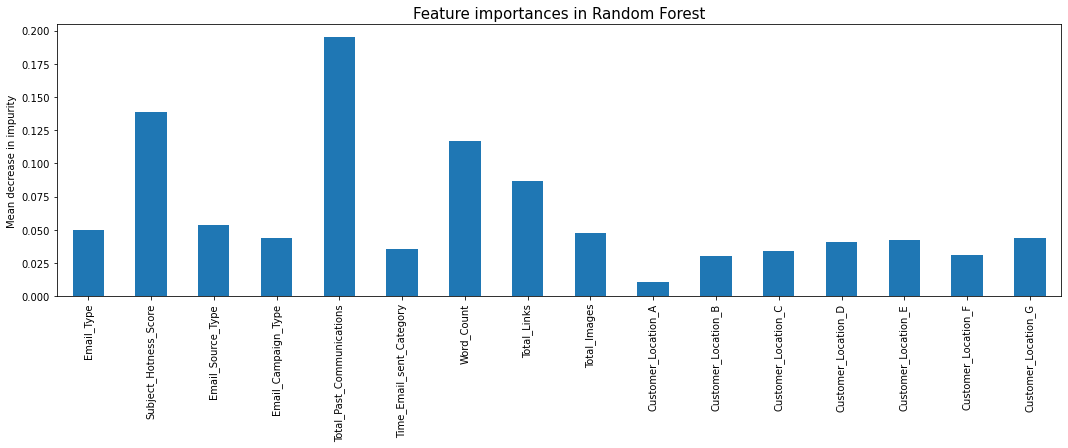

In [ ]:
# Getting Feature Importances
feature_importance = rf_model.feature_importances_
features = X_train.columns
forest_importances = pd.Series(feature_importance, index=features)

plt.figure(figsize=(18,5))

# Plotting feature importance for Random Forest
forest_importances.plot.bar()
plt.title("Feature importances in Random Forest", fontsize = 15)
plt.ylabel("Mean decrease in impurity")

We can see that Total Past Communications have the greatest effect in predicting email campaign effectiveness. And Customer Location A has the least importance. Subject Hotness Score and Word Count are also important features.

# **Final Verdicts :**

#### **1. Important Variables :** 
Total_Past_Communications, Subject_Hotness_Score and Word_Count are the 3 most important features in predicting effectiveness of the campaign.

#### **2. Best Model :** 
Gradient Boosting Machine is the best choice here. Although the model is overfit or prone to overfit, no other model could get to the accuracy on test set it has provided.

#### **3. Challenges faced :**
I am listing some challenges faced by me :
*   Huge data size.
*   Too much training time for black box models.
*   Choosing the best model due overfitting challenges.

#### **4. Use cases :**
Before discussing the use cases, let's understand the outputs first. I'm taking the GBM model as reference. If you see the precision of all 3 classes from the model, they are pretty good. But the recall and f1-score for class 1 is pretty bad. These observations signifies that this model is pretty good in predicting whether the customer will completely ignore or completely respond to the mail. If some company is thinking about somehow targeting the customers who have read the mails, that is choosing potential customers, the model won't give great results in that case.
